# Sensory Thresholds 

Absolute thresholds 
- Defined as the minimum amount of stimuli that must be present for the stimulus to be detected 50% of the time. 

Difference thresholds/Just-Noticeable-Difference (JND)
- Defined as the minimum amount of change in stimuli required for a difference between the stimuli to be detected 50% of the time.
- Calculated from a psychometric function as the IQR/2 

# Methods for Detecting Sensory Thresholds 

- Method of Constant Stimuli 
- Method of Limits 
- Method of Adjustment 

In [3]:
# setup
from Package import StaircaseSimulation
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random

# Transformed Staircase Procedure 
For this simulation, the psychometric function is defined by the absolute threshold (μ of the normal distribution) and the JND (set as sigma, i.e. the standard deviation). 

## Point of Subjective Equality (PSE) 
- X = stimulus intensity, P(X) = probability of detection at X 
- The adaptive/transformed staircase procedure doesn't converge at the ground truth (μ of the psychometric function), but rather converges on that value of X at which [p(X)]^3 = 0.5, i.e., p(X) = 0.794. Hence, the threshold detected by the 3down1up staircase is the stimulus intensity at which 79.4% responses are correct.
- Moreover, since a 2AFC task is implemented, the psychometric function will range from 0.5 to 1 because the proportion of correct responses due to chance is 0.5. 


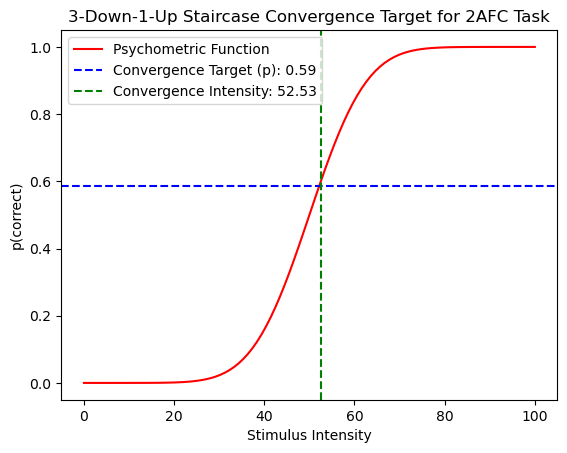

In [11]:

# setting x and y for the psychometric function 
stimulus_range, pr_correct = StaircaseSimulation.GetPsychometricFunction(PsychometricCurveMu = 50,
                                 PsychometricCurveSigma = 10,
                                 StimulusIntensityStart = 0, 
                                 StimulusIntensityStop = 100)
# getting the target probability according to the number of intervals in the task and the conditions for the staircase procedure 
target_probability, NumAFC, Criterion = StaircaseSimulation.GetStaircaseConvergenceTarget(NumAFC = 2, 
                                    Criterion = (3,1))
                                    
# calculating the stimulus intensity at which p(correct response) = 0.5 (point of subjective equality) in a 2AFC 3up1down staircase
target_intensity = StaircaseSimulation.GetStaircaseConvergenceIntensity(stimulus_range, pr_correct, target_probability)

# plotting the psychometric function 
StaircaseSimulation.PlotPsychometricFunctionTarget(stimulus_range, pr_correct, target_probability, target_intensity, Criterion, NumAFC)

Threshold Reached = 51.25
 Threshold Standard Deviation = 8.481597726843686


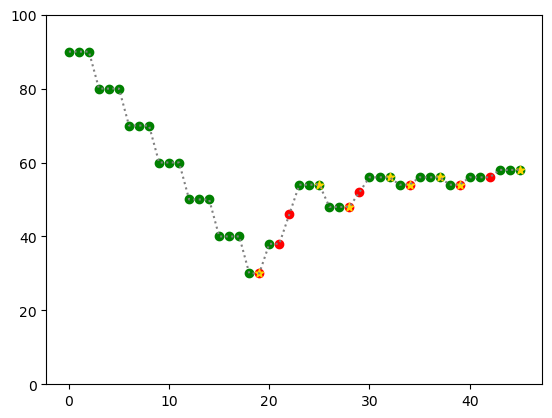

In [19]:
# Plotting an example run of the staircase''' 
(Trial_Amplitude_History, Reversion_Amplitude_History, Threshold_History,
 Detection_History, Num_Trials_History, Reversion_Trials_History) = StaircaseSimulation.SimulateTransformedStaircase(NumSimulations = 1,
    PsychometricCurveMu = 50,
    PsychometricCurveSigma = 10,
    StimulusIntensityStart = 0, # start of stimulus intensity range 
    StimulusIntensityStop = 100, # end of stimulus intensity range 
    MaxNumTrials = 100, 
    MaxReversions = 8,  
    NumAFC = 2, 
    Criterion = [3,1], 
    InitialStepSize = 10, 
    StepFactor = 0.725,
    NumInitialReversionsSkipped = 2)
   
NumTrials = Num_Trials_History[0][0]
Trial_Amplitude_History = Trial_Amplitude_History[:NumTrials,0]
Detection_History = Detection_History[:NumTrials,0]
Reversion_Trials_History = Reversion_Trials_History[:,0]
Reversion_Amplitude_History = Reversion_Amplitude_History[:,0]
    
fig, ax = plt.subplots()
x_detect = np.where(Detection_History == 1)[0]
x_miss = np.where(Detection_History == 0)[0]

ax.plot(range(NumTrials), Trial_Amplitude_History, color = 'gray', linestyle = ':')
ax.scatter(x_detect, Trial_Amplitude_History[x_detect], color = 'green')
ax.scatter(x_miss, Trial_Amplitude_History[x_miss], color = 'red')
ax.scatter(Reversion_Trials_History, Reversion_Amplitude_History, marker = '*', color = 'gold')
plt.ylim(0, 100)

print(f'Threshold Reached = {np.mean(Reversion_Amplitude_History)}')
print(f' Threshold Standard Deviation = {(np.std(Reversion_Amplitude_History, axis = 0))}')

Optimizing Parameters for the Transformed Staircase 
- Number of reversions 
- Number of initial reversions skipped 
- Initial step size 
- Factor by which the step size is reduced after each reversion 

In [20]:
Trial_Amplitude_History, Reversion_Amplitude_History, Threshold_History, Detection_History, Num_Trials_History, Reversion_Trials_History = StaircaseSimulation.SimulateTransformedStaircase(NumSimulations = 1000, 
                                 PsychometricCurveMu = 50,
                                 PsychometricCurveSigma = 10,
                                 StimulusIntensityStart = 0, # start of stimulus intensity range 
                                 StimulusIntensityStop = 100, # end of stimulus intensity range 
                                 MaxNumTrials = 1000, 
                                 MaxReversions = 50,  
                                 NumAFC = 2, 
                                 Criterion = [3,1], 
                                 InitialStepSize = 10, 
                                 StepFactor = 0.725,
                                 NumInitialReversionsSkipped = 0)

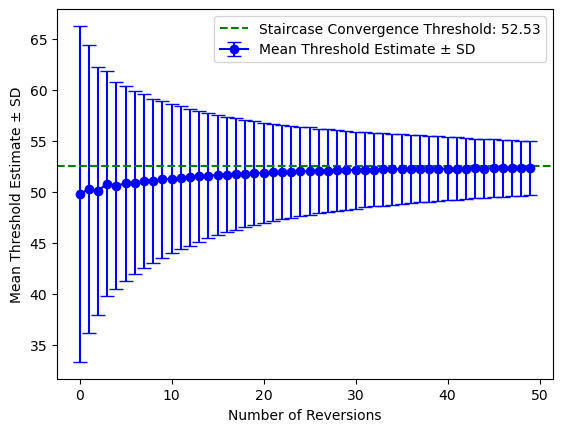

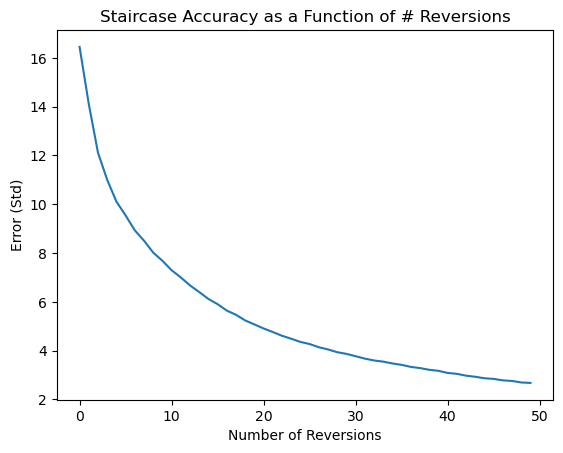

In [22]:
# For 1) and 2), calculate the reversion thresholds 
reversions_counted_thresholds, reversions_skipped_thresholds, NumReversions = StaircaseSimulation.CalculateReversionThresholds(Reversion_Amplitude_History = Reversion_Amplitude_History) 

''' 1) Number of reversions '''

# plotting 
rc_mean_threshold = np.mean(reversions_counted_thresholds, axis=0)
rc_threshold_sd = np.std(reversions_counted_thresholds, axis=0)
rs_mean_threshold = np.mean(reversions_skipped_thresholds, axis=0)
rs_threshold_sd = np.std(reversions_skipped_thresholds, axis=0)

# number of reversions vs threshold calulcated 
plt.errorbar(list(range(NumReversions)), rc_mean_threshold, yerr=rc_threshold_sd, fmt='o-', color='b', capsize=5, label='Mean Threshold Estimate ± SD')
plt.axhline(y=target_intensity, color='green', linestyle='--', label=f'Staircase Convergence Threshold: {target_intensity:.2f}')
plt.xlabel('Number of Reversions')
plt.ylabel('Mean Threshold Estimate ± SD')
plt.legend()
plt.show()

# plot number of reversions vs mean threshold error (sd) 
plt.plot(list(range(NumReversions)), rc_threshold_sd)
plt.xlabel('Number of Reversions')
plt.ylabel('Error (Std)')
plt.title('Staircase Accuracy as a Function of # Reversions')

plt.show()

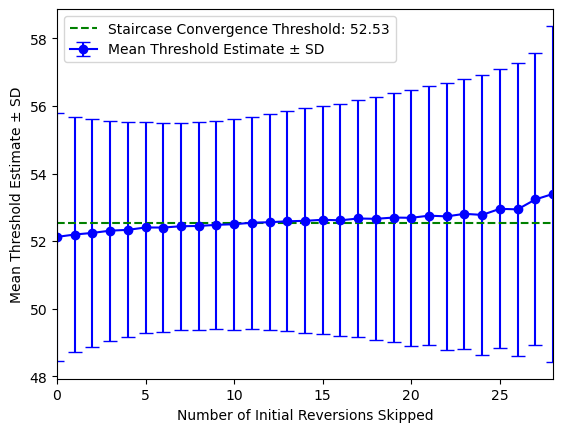

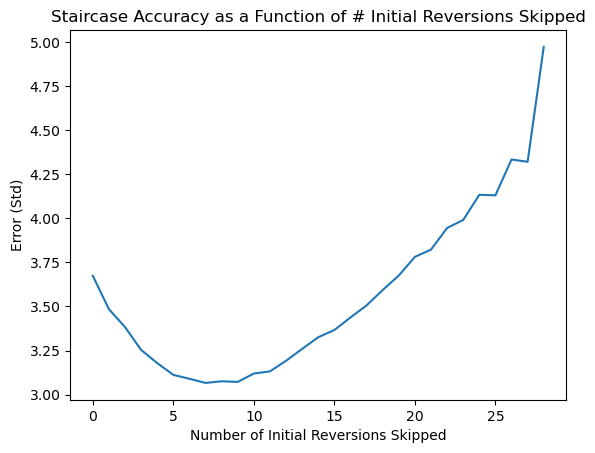

In [10]:
''' 2) Number of Initial Reversions Skipped '''
# number of initial reversions skipped vs threshold calulcated  
plt.errorbar(list(range(NumReversions-1)), rs_mean_threshold[:-1], yerr=rs_threshold_sd[:-1], fmt='o-', color='b', capsize=5, label='Mean Threshold Estimate ± SD')
plt.axhline(y=target_intensity, color='green', linestyle='--', label=f'Staircase Convergence Threshold: {target_intensity:.2f}')
plt.xlabel('Number of Initial Reversions Skipped')
plt.ylabel('Mean Threshold Estimate ± SD')
plt.xlim(0, NumReversions-2) 
plt.legend()
plt.show()

# plot number of reversions skipped vs mean threshold error (sd) 
plt.plot(list(range(NumReversions-1)), rs_threshold_sd[:-1])
plt.xlabel('Number of Initial Reversions Skipped')
plt.ylabel('Error (Std)')
plt.title('Staircase Accuracy as a Function of # Initial Reversions Skipped')
plt.show()

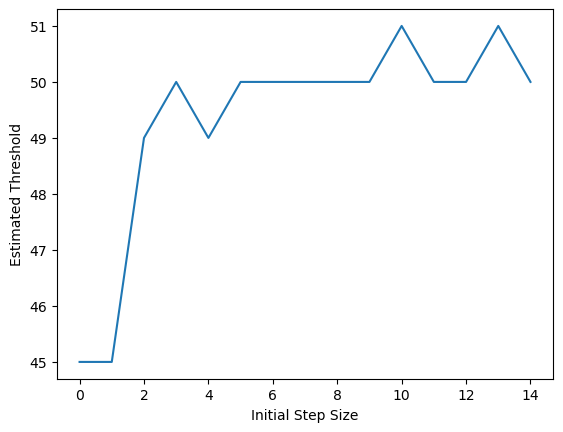

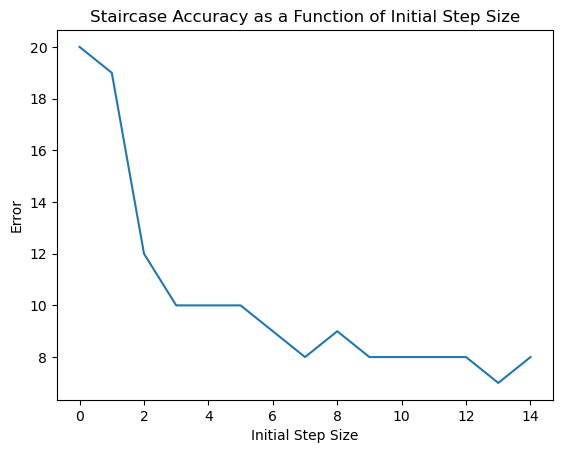

In [16]:
''' 3) Initial step size '''

initial_step_range = range(0, 15)

initial_step_thresholds = np.full((len(initial_step_range), 1), 0)
initial_step_errors = np.full((len(initial_step_range), 1), 0)

for step_sizes in initial_step_range: 
    Threshold_History = StaircaseSimulation.SimulateTransformedStaircase(NumSimulations = 1000, 
                                 PsychometricCurveMu = 50,
                                 PsychometricCurveSigma = 10,
                                 StimulusIntensityStart = 0, 
                                 StimulusIntensityStop = 100, 
                                 MaxNumTrials = 1000, 
                                 MaxReversions = 8,  
                                 NumAFC = 2, 
                                 Criterion = [3,1], 
                                 InitialStepSize = step_sizes, 
                                 StepFactor = 0.725,
                                 NumInitialReversionsSkipped = 0)[2]
    threshold = np.mean(Threshold_History) # calculate threshold for each initial step size 
    error = np.std(Threshold_History) # calculate the error 
    initial_step_thresholds[step_sizes, 0] = threshold 
    initial_step_errors[step_sizes, 0] = error 
    
plt.plot(list(initial_step_range), initial_step_thresholds)
plt.xlabel('Initial Step Size')
plt.ylabel('Estimated Threshold')
plt.show()

plt.plot(list(initial_step_range), initial_step_errors)
plt.xlabel('Initial Step Size')
plt.ylabel('Error')
plt.title('Staircase Accuracy as a Function of Initial Step Size')
plt.show()

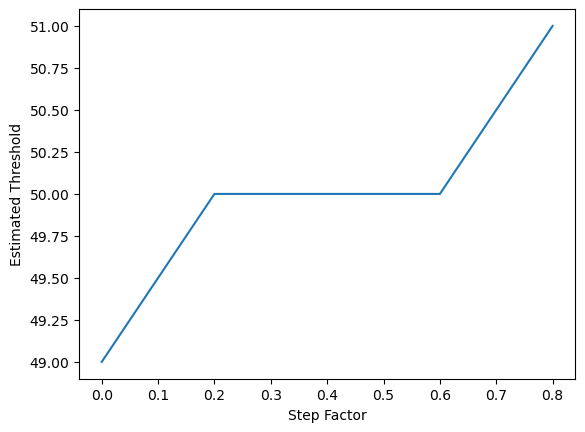

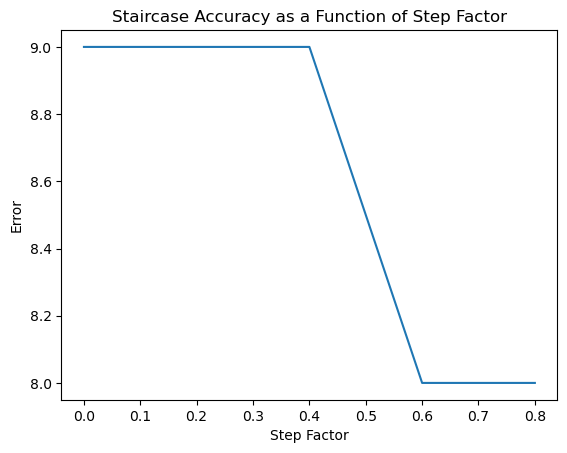

In [17]:
''' 4) Step factor '''

step_factor_range = np.arange(0, 1, 0.2)

step_factor_thresholds = np.full((len(step_factor_range), 1), 0)
step_factor_errors = np.full((len(step_factor_range), 1), 0)

for i, step_factors in enumerate(step_factor_range): 
    Threshold_History = StaircaseSimulation.SimulateTransformedStaircase(NumSimulations = 1000, 
                                 PsychometricCurveMu = 50,
                                 PsychometricCurveSigma = 10,
                                 StimulusIntensityStart = 0,  
                                 StimulusIntensityStop = 100, 
                                 MaxNumTrials = 1000, 
                                 MaxReversions = 8,  
                                 NumAFC = 2, 
                                 Criterion = [3,1], 
                                 InitialStepSize = 10, 
                                 StepFactor = step_factors,
                                 NumInitialReversionsSkipped = 0)[2]
    threshold = np.mean(Threshold_History) # calculate threshold for each step factor 
    error = np.std(Threshold_History) # calculate the error 
    step_factor_thresholds[i, 0] = threshold 
    step_factor_errors[i, 0] = error 
    
plt.plot(list(step_factor_range), step_factor_thresholds)
plt.xlabel('Step Factor')
plt.ylabel('Estimated Threshold')
plt.show()

plt.plot(list(step_factor_range), step_factor_errors)
plt.xlabel('Step Factor')
plt.ylabel('Error')
plt.title('Staircase Accuracy as a Function of Step Factor')
plt.show()